# Homework 2
Pedro Augusto Januzzi Guerra

Before we begin, let me explain how the code is structured. 

I have a jl file titled $\texttt{functions.jl}$ that contains all the functions that I have used while working on the problem set. One of my goals in this homework was to make even my simplest code more efficient. That's why, for instance, I have two functions to compute VFI: one with for loops and the other that relies only on matrices. I implemented the techniques we learned to accelerate the code to these two functions. Havind said that, not all of these functions are used to answer the questions. Some of them only served as auxiliary functions so that I could compare how much I would gain from transitioning from a code that relied on for loops to one that relied mostly on matrices.

Below there is a summary of all the functions and structures embedded in $\texttt{functions.jl}$ as well as an information on whether they are used to answer to questions in the problem set:

- mutable struct $\texttt{NeoclassicalGrowthModel}$: Contains the parameters used to solve the model.
- function $\texttt{capitalgrid}$: Computes a linearly spaced grid for capital. 
- function $\texttt{vfi1}$: Computes VFI with a stopping rule based on value function convergence. (not used to answer the questions)
- function $\texttt{vfi\_matrix}$: Computes VFI with a stopping rule based on value function convergence relying mostly on matrices. (not used)
- function $\texttt{vfi2}$: Computes VFI with a stopping rule based on policy function convergence. (not used)
- function $\texttt{vfi2\_matrix}$: Computes VFI with a stopping rule based on value function convergence relying mostly on matrices. (not used)
- function $\texttt{vfi3}$: Alters $\texttt{vfi2}$ by exploiting the monotonicity of the policy function. (not used)
- function $\texttt{vfi3\_matrix}$: Not yet finished. My idea is to the same as above, but relying on matrices. (not used)
- function $\texttt{vf\_mpi}$: Computes Howard's Modified Policy Iteration (MPI) algorithm relying on for loops. (not used)
- function $\texttt{vf\_mpi\_matrix}$: Computes Howard's Modified Policy Iteration (MPI) algorithm relying on matrices. (used)
- function $\texttt{vf\_mqp}$: Computes MQP algorithm relying on for loops. (not used)
- function $\texttt{vf\_mpi\_matrix}$: Computes MQP algorithm relying on matrices. (used)
- function $\texttt{vf\_mpi\_matrix2}$: Same as $\texttt{vf\_mpi\_matrix}$ but generates $V_{\text{old}}$ as output in order to update the solution to the value function. (used)
- function $\texttt{vf\_mpi\_matrix3}$: Same as $\texttt{vf\_mpi\_matrix2}$ used a stopping rule based on $\overline{c}$ and $\underline{c}$. (used)





Import functions and struct:

In [1]:
include("functions.jl")

vf_mpi_matrix3

# Question 1

Initialize an instance:

In [2]:
NGM = NeoclassicalGrowthModel()

NeoclassicalGrowthModel
  β: Float64 0.96
  α: Float64 0.4
  δ: Float64 0.1
  n: Int64 1
  kgrid: Array{Float64}((1,)) [0.0]
  A: Float64 1.0
  kss: Float64 1.0
  ub: Float64 10.0
  lb: Float64 0.7
  idx_initial: Int64 1
  nbf_mpi: Int64 1
  u: #12 (function of type var"#12#16")


## Item (a)

Now, I solve the problem using Howard's MPI algorithm for $n \in \{101,1001\}$ and $m\in{5,10,25,100,500}$. Note that these sets imply that I will run the model 10 times. Since these sets result in 10 different runs, I execute each parameter combination separately. This approach simplifies debugging and improves code readability. Each combination is run in a separate cell below. I also run the code with $m=0$ for $n=101$ and $n=1001$.

I use the package BenchmarkTools to precisely compute the time spent on each part of the code. I preferred to use this tool over the standard @time and @elapsed functions in Julia as BenchmarkTools works by repeatedly running the code several times to get a more precise measure of the time spent. 

Benchmark ($m=0$): VFI with $n = 101$

In [3]:
n = 101
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6

tabench = @belapsed vf_mpi_matrix(NGM,Vguess,tol,0) samples=5 evals=2
#= could also have used @benchmark
tabench = @benchmark vfi2(NGM,Vguess,tol) samples=5 evals=2
tabench = mean(tabench.times)/1e6 # gives time in ms I guess
=#

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Vabench, kpolabench,iterabench = vf_mpi_matrix(NGM,Vguess,tol,0);

Benchmark ($m=0$): VFI with $n=1001$:

In [4]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6

tabench2 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,0) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Vabench2, kpolabench2,iterabench2 = vf_mpi_matrix(NGM,Vguess,tol,0);

**Combination 1**: $n=101$ and $m=5$:

In [16]:
n = 101
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 5

ta1 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va1, kpola1,itera1 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 2**: $n=101$ and $m=10$:

In [6]:
Vguess = zeros(n)
tol = 1e-6
m = 10

ta2 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va2, kpola2,itera2 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 3**: $n=101$ and $m=25$:

In [7]:
Vguess = zeros(n)
tol = 1e-6
m = 25

ta3 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va3, kpola3,itera3 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 4**: $n=101$ and $m=100$:

In [8]:
Vguess = zeros(n)
tol = 1e-6
m = 100

ta4 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va4, kpola4,itera4 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 5**: $n=101$ and $m=500$:

In [9]:
Vguess = zeros(n)
tol = 1e-6
m = 500

ta5 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va5, kpola5,itera5 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 6**: $n=1001$ and $m=5$:

In [10]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 5

ta6 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va6, kpola6,itera6 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 7**: $n=1001$ and $m=10$:

In [19]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 10

ta7 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va7, kpola7,itera7 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 8**: $n=1001$ and $m=25$:

In [12]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 25

ta8 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va8, kpola8,itera8 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 9**: $n=1001$ and $m=100$:

In [13]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 100

ta9 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va9, kpola9,itera9 = vf_mpi_matrix(NGM,Vguess,tol,m);

**Combination 10**: $n=1001$ and $m=500$:

In [14]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 500

ta10 = @belapsed vf_mpi_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Va10, kpola10,itera10 = vf_mpi_matrix(NGM,Vguess,tol,m);

Create a table for time comparison for $n=101$:

In [17]:
time = [tabench, ta1, ta2, ta3, ta4, ta5]
time_rel = time ./ tabench
grid_pts = [101, 101, 101, 101, 101, 101]
method = ["VFI", "MPI", "MPI", "MPI", "MPI", "MPI"]
size_m = ["-", 5, 10, 25, 100, 500]

data = hcat(time, time_rel, grid_pts, method, size_m)

header = ["Absolute time (s)","Time Relative to VFI", "# Grid Pts", "Method", "m"]

# Display the table
table1 = pretty_table(data, header = header,border_crayon=crayon"bold yellow",tf=tf_simple)

==================== ====================== ============ ======== ======
  Absolute time (s)   Time Relative to VFI   # Grid Pts   Method     m  
==================== ====================== ============ ======== ======
         0.00100915                    1.0          101      VFI     -  
          0.0005965               0.591092          101      MPI     5  
          0.0002694               0.266957          101      MPI    10  
         0.00098595                0.97701          101      MPI    25  
          0.0015972                1.58272          101      MPI   100  
          0.0050196                4.97409          101      MPI   500  
==================== ====================== ============ ======== ======


Create a table for time comparison for $n=1001$:

In [20]:
time = [tabench2, ta6, ta7, ta8, ta9, ta10]
time_rel = time ./ tabench2
grid_pts = [1001, 1001, 1001, 1001, 1001, 1001]
method = ["VFI", "MPI", "MPI", "MPI", "MPI", "MPI"]
size_m = ["-", 5, 10, 25, 100, 500]

data = hcat(time, time_rel, grid_pts, method, size_m)

header = ["Absolute time (s)","Time Relative to VFI", "# Grid Pts", "Method", "m"]

# Display the table
table2 = pretty_table(data, header = header,border_crayon=crayon"bold yellow",tf=tf_simple)

==================== ====================== ============ ======== ======
  Absolute time (s)   Time Relative to VFI   # Grid Pts   Method     m  
==================== ====================== ============ ======== ======
           0.248919                    1.0         1001      VFI     -  
           0.114666               0.460654         1001      MPI     5  
           0.105304               0.423044         1001      MPI    10  
           0.112874               0.453455         1001      MPI    25  
           0.168589               0.677283         1001      MPI   100  
           0.211006                0.84769         1001      MPI   500  
==================== ====================== ============ ======== ======


Plot value functions for $n=101$:

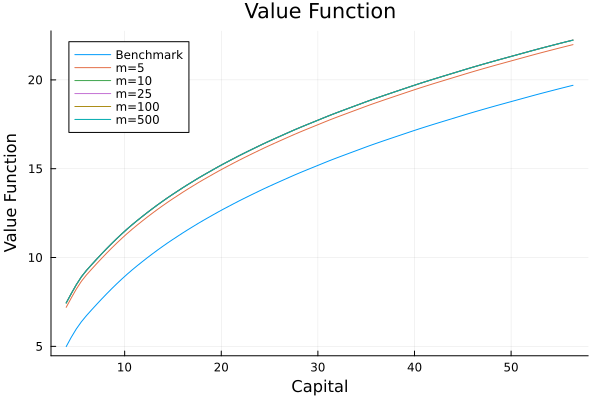

In [21]:
# change n in the instance
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
plot(kgrid, Vabench, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Benchmark")
plot!(kgrid, Va1, label="m=5")
plot!(kgrid, Va2, label="m=10")
plot!(kgrid, Va3, label="m=25")
plot!(kgrid, Va4, label="m=100")
plot!(kgrid, Va5, label="m=500")

Firstly, note that all the solutions to the value function using MPI are different that the solution to regular VFI with a stopping rule based on policy convergence. Moreover, the solutions for $m=100$ and $m=500$, as the script below shows:

In [22]:
if Va4 == Va5
    println("Solutions for m=100 and m=500 coincide.")
else
    println("Solutions for m=100 and m=500 do not coincide.")
end

Solutions for m=100 and m=500 coincide.


The other solutions are close to each other, which is why they are not easily seen in the graph below. The difference between the value functions for $m=100$ and $m=25$ is:

In [23]:
Va4-Va3

101-element Vector{Float64}:
 1.155397518992629e-6
 1.1553975181044507e-6
 1.1553975181044507e-6
 1.257045568081594e-6
 1.362846717256616e-6
 1.362846717256616e-6
 1.362846717256616e-6
 1.362846717256616e-6
 1.362846719032973e-6
 1.362846719032973e-6
 ⋮
 1.3628467279147571e-6
 1.3628467243620435e-6
 1.3628467279147571e-6
 1.3628467279147571e-6
 1.3628467279147571e-6
 1.3628467279147571e-6
 1.3628467279147571e-6
 1.3628467314674708e-6
 1.3628467314674708e-6

And from $m=25$ and $m=10$ is:

In [24]:
Va3-Va2

101-element Vector{Float64}:
 0.009418315410219869
 0.009418315410220757
 0.009418315410220757
 0.009709425311713815
 0.00987363119213569
 0.00987363119213569
 0.00987363119213569
 0.00987363119213569
 0.00987363119213569
 0.00987363119213569
 ⋮
 0.009873631192142795
 0.009873631192142795
 0.009873631192142795
 0.009873631192142795
 0.009873631192142795
 0.009873631192139243
 0.009873631192139243
 0.00987363119213569
 0.00987363119213569

Plot policy functions for $n=101$:

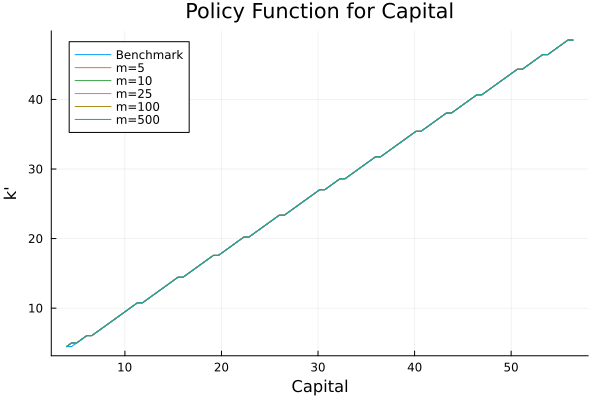

In [25]:
plot(kgrid, kpolabench, xlabel="Capital", ylabel="k'",title="Policy Function for Capital", label="Benchmark")
plot!(kgrid, kpola1, label="m=5")
plot!(kgrid, kpola2, label="m=10")
plot!(kgrid, kpola3, label="m=25")
plot!(kgrid, kpola4, label="m=100")
plot!(kgrid, kpola5, label="m=500")

The policy function is identical for all values of $m$, except for $m=0$, which corresponds to regular VFI.

In [26]:
if kpola1 == kpola2 == kpola3 == kpola4 == kpola5
    println("All policy functions coincide.")
end
    

All policy functions coincide.


Difference between policy function for $m=5$ and regular VFI:

In [27]:
kpola1 - kpolabench

101-element Vector{Float64}:
 0.0
 0.5245700307063528
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

Plot value functions for $n=1001$:

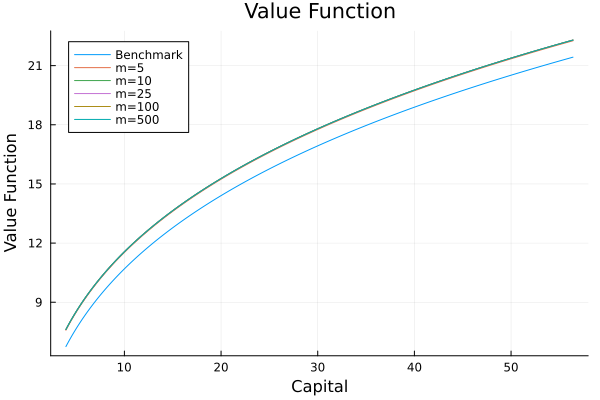

In [28]:
# change n in the instance
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
plot(kgrid, Vabench2, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Benchmark")
plot!(kgrid, Va6, label="m=5")
plot!(kgrid, Va7, label="m=10")
plot!(kgrid, Va8, label="m=25")
plot!(kgrid, Va9, label="m=100")
plot!(kgrid, Va10, label="m=500")

Differently than before ($n=101$), now the value function for all value of $m$ are close to each other. Once again, the solutions for $m=100$ and $m=500$ coincide:

In [29]:
if Va9 == Va10
    println("Solution to value function for m=100 and m=500 coincide.")
end

Solution to value function for m=100 and m=500 coincide.


Difference between $m=10$ and $m=5$

In [30]:
Va7 - Va6

1001-element Vector{Float64}:
 0.034671038705921475
 0.034671038705921475
 0.034671038705926804
 0.03467103870592947
 0.03467103870592947
 0.03467103870592769
 0.034671038705926804
 0.034671038705926804
 0.03467103870592503
 0.03467103870592858
 ⋮
 0.03469555352727127
 0.03469555352727127
 0.03469555352727127
 0.03469555352727127
 0.03469555352726772
 0.03469555352726417
 0.03469555352726772
 0.03469555352726772
 0.03469555352726772

Difference between $m=25$ and $m=10$:

In [31]:
Va8-Va7

1001-element Vector{Float64}:
 0.001050364095559253
 0.001050364095559253
 0.0010503640955574767
 0.0010503640955530358
 0.0010503640955530358
 0.0010503640955565885
 0.0010503640955565885
 0.0010503640955565885
 0.0010503640955565885
 0.0010503640955565885
 ⋮
 0.001052574136764406
 0.001052574136764406
 0.001052574136764406
 0.001052574136764406
 0.0010525741367679586
 0.0010525741367715113
 0.0010525741367679586
 0.0010525741367679586
 0.001052574136764406

Lastly, difference between $m=100$ and $m=25$:

In [32]:
Va9-Va8

1001-element Vector{Float64}:
 2.3797088744004213e-8
 2.3797087855825794e-8
 2.3797087855825794e-8
 2.3797089632182633e-8
 2.3797088744004213e-8
 2.3797088744004213e-8
 2.3797087855825794e-8
 2.3797087855825794e-8
 2.3797088744004213e-8
 2.3797086967647374e-8
 ⋮
 2.468194182370098e-8
 2.4681938270987303e-8
 2.4681938270987303e-8
 2.468194182370098e-8
 2.4681934718273624e-8
 2.4681931165559945e-8
 2.4681931165559945e-8
 2.4681934718273624e-8
 2.468194182370098e-8

Plot policy functions for $n=1001$:

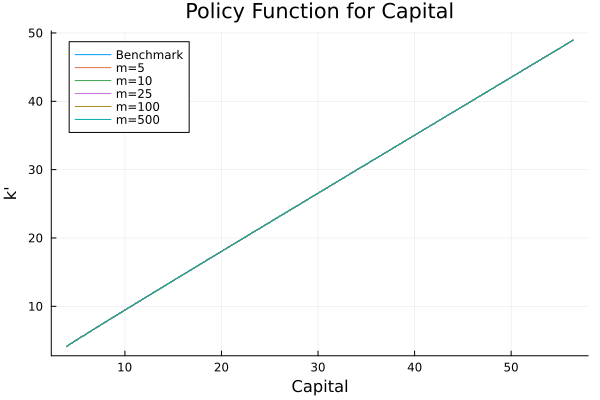

In [33]:
plot(kgrid, kpolabench2, xlabel="Capital", ylabel="k'",title="Policy Function for Capital", label="Benchmark")
    plot!(kgrid, kpola6, label="m=5")
    plot!(kgrid, kpola7, label="m=10")
    plot!(kgrid, kpola8, label="m=25")
    plot!(kgrid, kpola9, label="m=100")
    plot!(kgrid, kpola10, label="m=500")

Policy functions for all values of $m$ coincide once again:

In [34]:
if kpola6 == kpola7 == kpola8 == kpola9 == kpola10
    println("All policy functions coincide.")
end

All policy functions coincide.


Difference between policy functions for all m's and benchmark ($m=0$):

In [35]:
kpola6-kpolabench2

1001-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.05245700307063572

## Item (b)

First, I run the code for $n=101$ and $m=1$:

In [46]:
n = 101
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 1

tb1 = @belapsed vf_mqp_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Vb1, kpolb1,iterb1 = vf_mqp_matrix(NGM,Vguess,tol,m);

$n=101$ and $m=5$:

In [47]:
Vguess = zeros(n)
tol = 1e-6
m = 5

tb2 = @belapsed vf_mqp_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Vb2, kpolb2,iterb2 = vf_mqp_matrix(NGM,Vguess,tol,m);

$n=1001$ and $m=1$:

In [48]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 1

tb3 = @belapsed vf_mqp_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Vb3, kpolb3,iterb3 = vf_mqp_matrix(NGM,Vguess,tol,m);

$n=1001$ and $m=5$:

In [49]:
n = 1001
NGM.n = n
kgrid = capitalgrid(NGM)

Vguess = zeros(n)
tol = 1e-6
m = 5

tb4 = @belapsed vf_mqp_matrix(NGM,Vguess,tol,m) samples=5 evals=2

# the code above does not store the values of Va1, kpola1, itera1, so I run the code now with this goal:
Vb4, kpolb4,iterb4 = vf_mqp_matrix(NGM,Vguess,tol,m);

### Subitem (i)

Plot graphs for $n=101$:

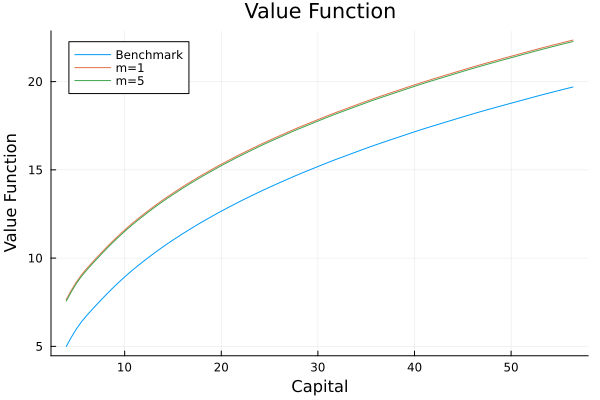

In [50]:
# change n in the instance
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
plot(kgrid, Vabench, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Benchmark")
plot!(kgrid, Vb1, label="m=1")
plot!(kgrid, Vb2, label="m=5")

The difference from the benchmark ($m=0$) can be easily seen from the graph. 

The difference between $m=1$ and $m=5$ is:

In [51]:
Vb1 - Vb2

101-element Vector{Float64}:
 0.08305751319965893
 0.08305751319965893
 0.08305751319965893
 0.08305751319965715
 0.08305751319965893
 0.08305751319965893
 0.0830575131996607
 0.08305751319965893
 0.0830575131996607
 0.0830575131996607
 ⋮
 0.08305751319965893
 0.08305751319965538
 0.08305751319965893
 0.08305751319965893
 0.08305751319965538
 0.08305751319966248
 0.08305751319966603
 0.08305751319965893
 0.08305751319965893

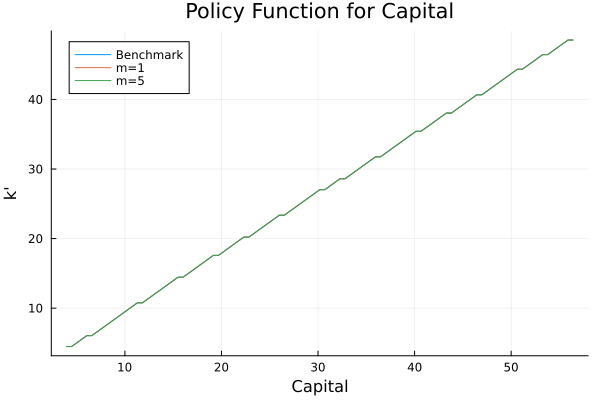

In [52]:
plot(kgrid, kpolabench, xlabel="Capital", ylabel="k'",title="Policy Function for Capital", label="Benchmark")
plot!(kgrid, kpolb1, label="m=1")
plot!(kgrid, kpolb2, label="m=5")

In [53]:
if kpolabench == kpolb1 == kpolb2 
    println("All policy functions coincide.")
end

All policy functions coincide.


### Subitem (ii)

Create a table for time comparison for $n=101$:

In [54]:
time = [tabench, ta1, ta2, ta3, ta4, ta5, tb1, tb2]
time_rel = time ./ tabench
grid_pts = [101, 101, 101, 101, 101, 101, 101, 101]
method = ["VFI", "MPI", "MPI", "MPI", "MPI", "MPI", "MQP", "MQP"]
size_m = ["-", 5, 10, 25, 100, 500, 1, 5]

data = hcat(time, time_rel, grid_pts, method, size_m)

header = ["Absolute time (s)","Time Relative to VFI", "# Grid Pts", "Method", "m"]

# Display the table
table1 = pretty_table(data, header = header,border_crayon=crayon"bold yellow",tf=tf_simple)

==================== ====================== ============ ======== ======
  Absolute time (s)   Time Relative to VFI   # Grid Pts   Method     m  
==================== ====================== ============ ======== ======
         0.00100915                    1.0          101      VFI     -  
          0.0005965               0.591092          101      MPI     5  
          0.0002694               0.266957          101      MPI    10  
         0.00098595                0.97701          101      MPI    25  
          0.0015972                1.58272          101      MPI   100  
          0.0050196                4.97409          101      MPI   500  
         0.00115005                1.13962          101      MQP     1  
         0.00114525                1.13487          101      MQP     5  
==================== ====================== ============ ======== ======


Create a table for time comparison for $n=1001$:

In [55]:
time = [tabench2, ta6, ta7, ta8, ta9, ta10, tb3, tb4]
time_rel = time ./ tabench2
grid_pts = [1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001]
method = ["VFI", "MPI", "MPI", "MPI", "MPI", "MPI", "MQP", "MQP"]
size_m = ["-", 5, 10, 25, 100, 500, 1, 5]

data = hcat(time, time_rel, grid_pts, method, size_m)

header = ["Absolute time (s)","Time Relative to VFI", "# Grid Pts", "Method", "m"]

# Display the table
table2 = pretty_table(data, header = header,border_crayon=crayon"bold yellow",tf=tf_simple)

==================== ====================== ============ ======== ======
  Absolute time (s)   Time Relative to VFI   # Grid Pts   Method     m  
==================== ====================== ============ ======== ======
           0.248919                    1.0         1001      VFI     -  
           0.114666               0.460654         1001      MPI     5  
           0.105304               0.423044         1001      MPI    10  
           0.112874               0.453455         1001      MPI    25  
           0.168589               0.677283         1001      MPI   100  
           0.211006                0.84769         1001      MPI   500  
           0.233428               0.937768         1001      MQP     1  
           0.241176               0.968894         1001      MQP     5  
==================== ====================== ============ ======== ======


### Item (c)

#### Subitem (i)

Let's start with $n=101$:

In [62]:
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-6
m = 5
Vc1, kpolc1, iterc1,Voldc1 = vf_mpi_matrix2(NGM, Vguess, tol, m)
#compute c_lower and c_upper
c_low = NGM.β/(1-NGM.β) * minimum(Vc1.-Voldc1)
c_upp = NGM.β/(1-NGM.β) * maximum(Vc1.-Voldc1)
#update Vnew
Vc1up = Vc1 .+ (c_low+c_upp)/2;

Now I solve for $n=1001$:

In [63]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-6
m = 5
Vc2, kpolc2, iterc2,Voldc2 = vf_mpi_matrix2(NGM, Vguess, tol, m)
#compute c_lower and c_upper
c_low = NGM.β/(1-NGM.β) * minimum(Vc2.-Voldc2)
c_upp = NGM.β/(1-NGM.β) * maximum(Vc2.-Voldc2)
#update Vnew
Vc2up = Vc2 .+ (c_low+c_upp)/2;

##### (A)

Plot value function of item (c) together with the one obtained in (a):

$ n = 101$:

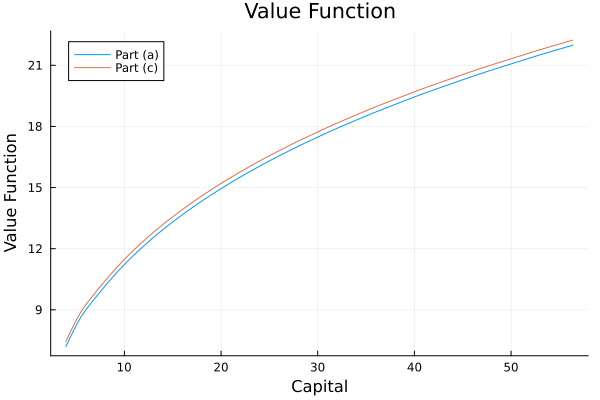

In [64]:
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
plot(kgrid, Va1, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Part (a)")
plot!(kgrid, Vc1up, label="Part (c)")

$n=1001$:

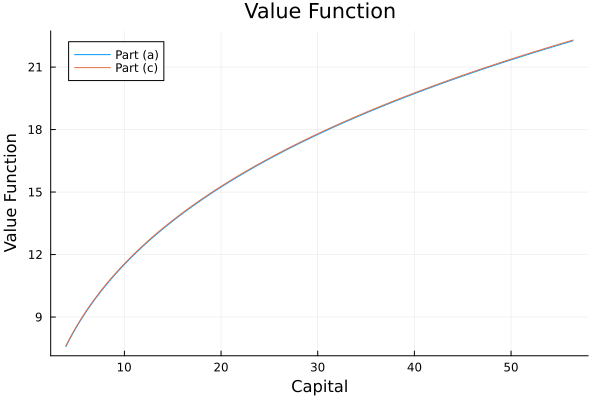

In [65]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
plot(kgrid, Va6, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Part (a)")
plot!(kgrid, Vc2up, label="Part (c)")

For a grid with $1001$ points, the value function obtained here and in part (a) are closer to each other than when consider only $101$ points. However, the solutions do not coincide. The difference between part (c) and part (a) (with $1001$ points) is:

In [66]:
Va6 - Vc2up

1001-element Vector{Float64}:
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
  ⋮
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163
 -0.03573478947237163

##### (B)

Get the true solution for $n=101$:

In [67]:
# Get a0 and a1
@unpack α,β,A = NGM;
a1 = α/(1-α*β);
a0 = (1/(1-β))*(1/(1-α*β))*(log(A) - log(1/(1-α*β)) + β*α*log(β) + β*α*log(α/(1-α*β))); 
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vtrue = Vector{Float64}(undef, n)
k′_true = Vector{Float64}(undef, n);
Vtrue .= a0 .+ a1.*log.(kgrid);
k′_true .= β*a1*A.*kgrid.^α./(1+β*a1);

Compute the solution with $\delta=1$:

In [68]:
n = 101;
NGM.n=n;
δ=1;
NGM.δ=δ;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-6
m = 5
Vc3, kpolc3, iterc3,Voldc3 = vf_mpi_matrix2(NGM, Vguess, tol, m)
#compute c_lower and c_upper
c_low = NGM.β/(1-NGM.β) * minimum(Vc3.-Voldc3)
c_upp = NGM.β/(1-NGM.β) * maximum(Vc3.-Voldc3)
#update Vnew
Vc3up = Vc3 .+ (c_low+c_upp)/2;

Plot the true solution with $T^nV_0$ and $V_n^*$:

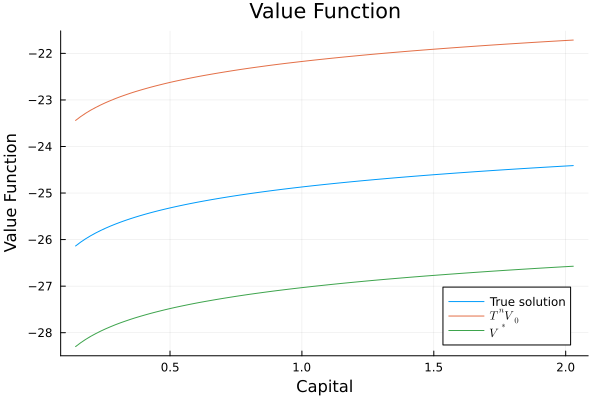

In [69]:
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
using LaTeXStrings
plot(kgrid, Vtrue, xlabel="Capital", ylabel="Value Function",title="Value Function", label="True solution")
plot!(kgrid, Vc3, label=L"T^n V_0")
plot!(kgrid,Vc3up,label=L"V^*")

With $101$ points in the capital grid, the updated solution $V_n^*$ is closer to the true solution than $T^nV_0$ is.

Now I do the same for $n=1001$:

In [70]:
# Get a0 and a1
@unpack α,β,A = NGM;
a1 = α/(1-α*β);
a0 = (1/(1-β))*(1/(1-α*β))*(log(A) - log(1/(1-α*β)) + β*α*log(β) + β*α*log(α/(1-α*β))); 
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vtrue = Vector{Float64}(undef, n)
k′_true = Vector{Float64}(undef, n);
Vtrue .= a0 .+ a1.*log.(kgrid);
k′_true .= β*a1*A.*kgrid.^α./(1+β*a1);

In [71]:
δ=1;
NGM.δ=δ;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-6
m = 5
Vc4, kpolc4, iterc4,Voldc4 = vf_mpi_matrix2(NGM, Vguess, tol, m)
#compute c_lower and c_upper
c_low = NGM.β/(1-NGM.β) * minimum(Vc4.-Voldc4)
c_upp = NGM.β/(1-NGM.β) * maximum(Vc4.-Voldc4)
#update Vnew
Vc4up = Vc4 .+ (c_low+c_upp)/2;

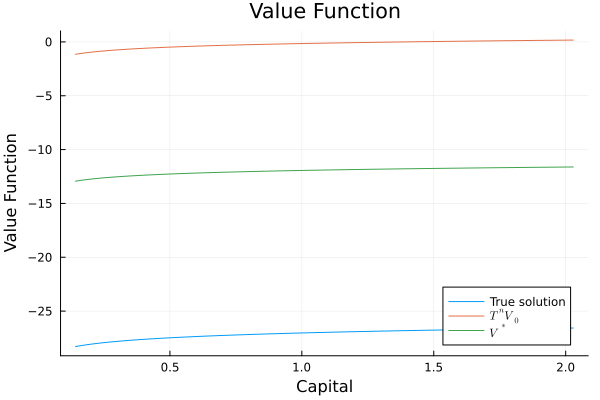

In [72]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
using LaTeXStrings
plot(kgrid, Vtrue, xlabel="Capital", ylabel="Value Function",title="Value Function", label="True solution")
plot!(kgrid, Vc4, label=L"T^n V_0")
plot!(kgrid,Vc4up,label=L"V^*")

Once again, $V_n^*$ is closer to the true solution than $T^nV_0$ is.

#### Subitem (ii)

I start with $n=101$:

In [73]:
n = 101;
NGM.n=n;
δ=0.1;
NGM.δ=δ;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-8
m = 5
Vc5, kpolc5, iterc5,Vupc5 = vf_mpi_matrix3(NGM, Vguess, tol, m);

Now $n=1001$:

In [74]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-8
m = 5
Vc6, kpolc6, iterc6,Vupc6 = vf_mpi_matrix3(NGM, Vguess, tol, m);

##### (A)

Plot the decision rule with its counterpart in part (a) for $n=101$:

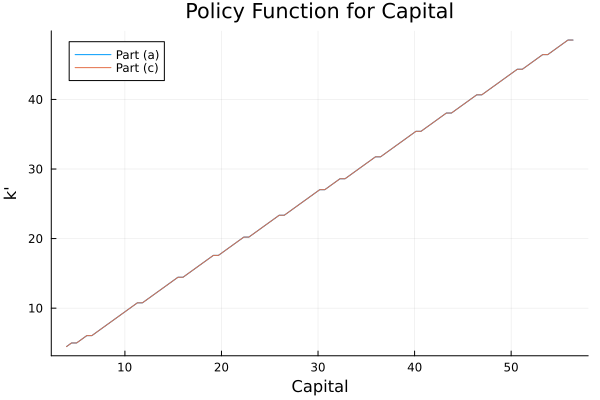

In [75]:
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
using LaTeXStrings
plot(kgrid, kpola1, xlabel="Capital", ylabel="k'",title="Policy Function for Capital", label="Part (a)")
plot!(kgrid, kpolc5, label="Part (c)")

In [76]:
if kpola1 == kpolc5
    println("Policy functions coincide.")
end

Policy functions coincide.


For $n=1001$:

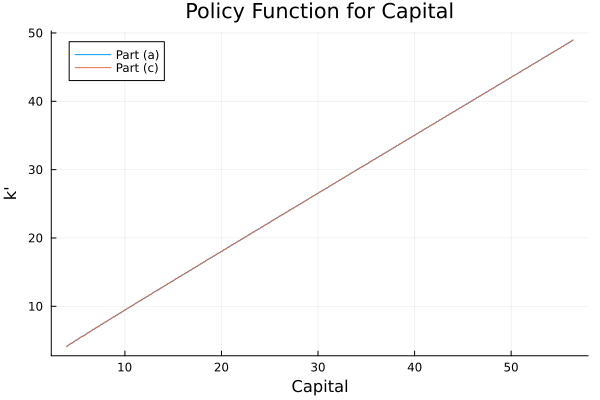

In [77]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
using LaTeXStrings
plot(kgrid, kpola6, xlabel="Capital", ylabel="k'",title="Policy Function for Capital", label="Part (a)")
plot!(kgrid, kpolc6, label="Part (c)")

In [78]:
if kpola6 == kpolc6
    println("Policy functions coincide.")
end

Policy functions coincide.


##### (B)

$n=101$:

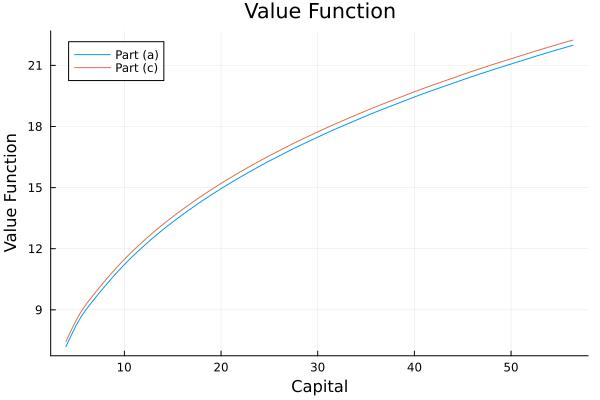

In [79]:
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
using LaTeXStrings
plot(kgrid, Va1, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Part (a)")
plot!(kgrid, Vc5, label="Part (c)")

$n=1001$:

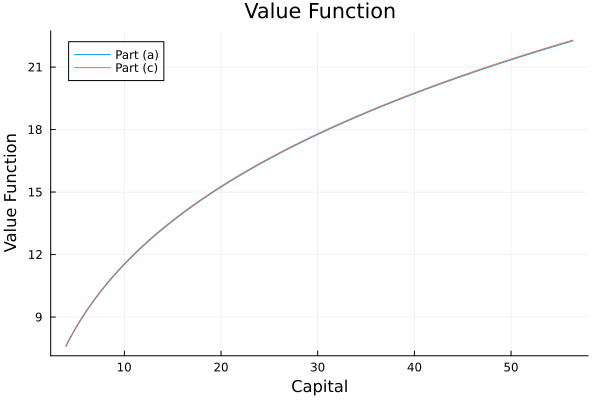

In [80]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
using LaTeXStrings
plot(kgrid, Va6, xlabel="Capital", ylabel="Value Function",title="Value Function", label="Part (a)")
plot!(kgrid, Vc6, label="Part (c)")

To answer the final question of this item, I run a VFI with stopping rule based on value function convergence. I want the solution to this algorithm to stop when the value function is $\varepsilon = 10^{-6}$ away from the true solution, so I use a tolerance of $\varepsilon*(1-\beta)$.

In [81]:
n = 101;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-6*(1-NGM.β)
vf1,kvfi1, itvfi1 = vfi1(NGM, Vguess,tol);

Distance between solution in part (a) and the one above:

In [82]:
dist = norm(Va1-vf1,Inf)

0.2567321516756884

Distance between solution in part (c) and the one above:

In [83]:
dist2 = norm(Vc5-vf1,Inf)

6.506027361297129e-7

Hence, $\overline{c}-\underline{c} < 10^{-8}$ is a tighter rule than the one based on decision rules and tolerance of $10^{-6}$ for a grid of capital with $101$ points.

Now I do the same for $1001$ points in the grid.

In [84]:
n = 1001;
NGM.n=n;
kgrid = capitalgrid(NGM)
Vguess = zeros(n)
tol = 1e-6*(1-NGM.β)
vf2,kvfi2, itvfi2 = vfi1(NGM, Vguess,tol);

Distance between solution in part (a) and the one above:

In [85]:
dist3 = norm(Va6-vf2,Inf)

0.035747194494486934

Distance between solution in part (c) and the one above:

In [86]:
dist = norm(Vc6-vf2,Inf)

1.0081860459365544e-5

Hence, $\overline{c}-\underline{c} < 10^{-8}$ is a tighter rule than the one based on decision rules and tolerance of $10^{-6}$ for a grid of capital with $101$ points.